In [873]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [874]:
df=pd.read_csv('train.csv')

In [875]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
273,LP001894,Male,Yes,0,Graduate,No,2620,2223.0,150.0,360.0,1.0,Semiurban,Y
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y
160,LP001560,Male,Yes,0,Not Graduate,No,1863,1041.0,98.0,360.0,1.0,Semiurban,Y
178,LP001616,Male,Yes,1,Graduate,No,3750,0.0,116.0,360.0,1.0,Semiurban,Y
582,LP002894,Female,Yes,0,Graduate,No,3166,0.0,36.0,360.0,1.0,Semiurban,Y
27,LP001073,Male,Yes,2,Not Graduate,No,4226,1040.0,110.0,360.0,1.0,Urban,Y
412,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural,N
495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y
512,LP002643,Male,Yes,2,Graduate,No,3283,2035.0,148.0,360.0,1.0,Urban,Y
383,LP002234,Male,No,0,Graduate,Yes,7167,0.0,128.0,360.0,1.0,Urban,Y


In [876]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [877]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Missing value

In [878]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

## Convert the value string to int

In [879]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [880]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df.Gender.value_counts()

1.0    489
0.0    112
Name: Gender, dtype: int64

In [881]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [882]:
df.Married=df.Married.map({'Yes':1,'No':0})
df.Married.value_counts()

1.0    398
0.0    213
Name: Married, dtype: int64

In [883]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [884]:
df.Dependents=df.Dependents.fillna('0')

In [885]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [886]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df.Education.value_counts()

1    480
0    134
Name: Education, dtype: int64

In [887]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [888]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df.Self_Employed.value_counts()

0.0    500
1.0     82
Name: Self_Employed, dtype: int64

In [889]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Semiurban':1,'Rural':0})
df.Property_Area.value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [890]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [891]:
df.Loan_Status=df.Loan_Status.map({'Y':1,'N':0})

In [892]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Fill the missing value

In [893]:
df.Gender.value_counts()

1.0    489
0.0    112
Name: Gender, dtype: int64

In [894]:
df.Gender=df.Gender.fillna(1.0)
df.Gender.value_counts()

1.0    502
0.0    112
Name: Gender, dtype: int64

In [895]:
df.Married.value_counts()

1.0    398
0.0    213
Name: Married, dtype: int64

In [896]:
df.Married=df.Married.fillna(1.0)
df.Married.value_counts()

1.0    401
0.0    213
Name: Married, dtype: int64

In [897]:
df.Self_Employed.value_counts()

0.0    500
1.0     82
Name: Self_Employed, dtype: int64

In [898]:
df.Self_Employed=df.Self_Employed.fillna(0.0)
df.Self_Employed.value_counts()

0.0    532
1.0     82
Name: Self_Employed, dtype: int64

In [899]:
df.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [900]:
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.median())
df.LoanAmount.value_counts()

128.0    33
120.0    20
110.0    17
100.0    15
187.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [901]:
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [902]:
df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(360.0)
df.Loan_Amount_Term.value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [903]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [904]:
df.Credit_History=df.Credit_History.fillna(df['Loan_Status'])
df.Credit_History.value_counts()

1.0    512
0.0    102
Name: Credit_History, dtype: int64

In [905]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Correlation

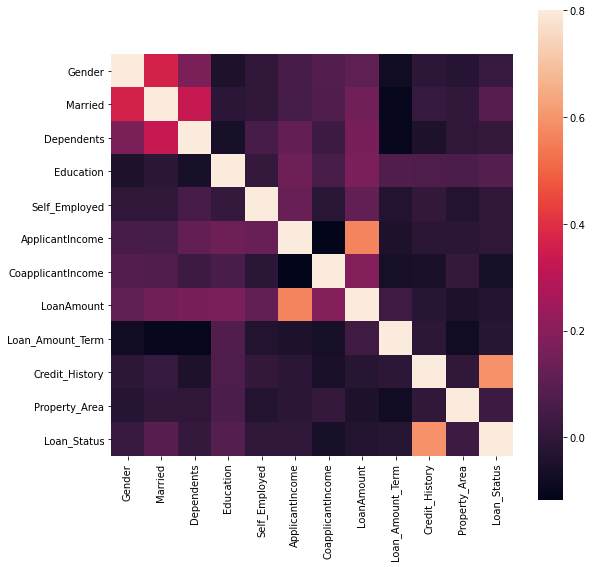

In [906]:
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [907]:
df.drop('Loan_ID',axis=1,inplace=True)

In [908]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [909]:
x_train=df.iloc[:,0:11]
y_train=df.iloc[:,11]

In [910]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.20, random_state = 42)

## Model 


In [911]:
models=[]
models.append(('Naive bayes',GaussianNB()))
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Decision TreeClassifier',DecisionTreeClassifier()))
models.append(('SVM',SVC()))
models.append(('Linear Discriminant Analysis',LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier',KNeighborsClassifier()))
models.append(('AdaBoost Classifier',AdaBoostClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('Voting Classifier',VotingClassifier(estimators=[('mnb',GaussianNB()),('lr',LogisticRegression()),
                                                               ('rf',RandomForestClassifier()),('svm',SVC())],voting='hard')))
models.append(('Stochastic Gradient Descent',SGDClassifier()))               

In [912]:
for model_name,model in models:
    model.fit(X_train,y_train)
    prd=model.predict(X_test)
    acc=accuracy_score(prd,y_test)
    
    print(model_name,"accuracy",":",acc)
    print()
    print('confusion_matrix')
    print(confusion_matrix(y_test,prd))
    print()
    print('classification_report')
    print(classification_report(y_test,prd))

Naive bayes accuracy : 0.8130081300813008

confusion_matrix
[[22 21]
 [ 2 78]]

classification_report
              precision    recall  f1-score   support

           0       0.92      0.51      0.66        43
           1       0.79      0.97      0.87        80

    accuracy                           0.81       123
   macro avg       0.85      0.74      0.76       123
weighted avg       0.83      0.81      0.80       123

Logistic Regression accuracy : 0.8211382113821138

confusion_matrix
[[22 21]
 [ 1 79]]

classification_report
              precision    recall  f1-score   support

           0       0.96      0.51      0.67        43
           1       0.79      0.99      0.88        80

    accuracy                           0.82       123
   macro avg       0.87      0.75      0.77       123
weighted avg       0.85      0.82      0.80       123

Decision TreeClassifier accuracy : 0.7235772357723578

confusion_matrix
[[24 19]
 [15 65]]

classification_report
              precis

C:\Users\tasli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Linear Discriminant Analysis accuracy : 0.8211382113821138

confusion_matrix
[[22 21]
 [ 1 79]]

classification_report
              precision    recall  f1-score   support

           0       0.96      0.51      0.67        43
           1       0.79      0.99      0.88        80

    accuracy                           0.82       123
   macro avg       0.87      0.75      0.77       123
weighted avg       0.85      0.82      0.80       123

KNeighborsClassifier accuracy : 0.5772357723577236

confusion_matrix
[[ 4 39]
 [13 67]]

classification_report
              precision    recall  f1-score   support

           0       0.24      0.09      0.13        43
           1       0.63      0.84      0.72        80

    accuracy                           0.58       123
   macro avg       0.43      0.47      0.43       123
weighted avg       0.49      0.58      0.52       123

AdaBoost Classifier accuracy : 0.7804878048780488

confusion_matrix
[[22 21]
 [ 6 74]]

classification_report
     

C:\Users\tasli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Crossed Validation

In [913]:
for model_name,model in models:
    kfold=KFold(n_splits=10,random_state=42)
    accuracy=cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    print(model_name,":",accuracy.mean())

C:\Users\tasli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Naive bayes : 0.810530612244898


C:\Users\tasli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\tasli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tasli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

Logistic Regression : 0.824857142857143
Decision TreeClassifier : 0.7313469387755103


C:\Users\tasli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVM : 0.6884897959183673


C:\Users\tasli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Linear Discriminant Analysis : 0.8330204081632653


C:\Users\tasli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNeighborsClassifier : 0.6601224489795918


C:\Users\tasli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


AdaBoost Classifier : 0.8268979591836734


C:\Users\tasli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


RandomForestClassifier : 0.8146938775510204


C:\Users\tasli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\tasli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tasli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

Voting Classifier : 0.8166938775510204


C:\Users\tasli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Stochastic Gradient Descent : 0.5905306122448979


## Test data preparing

In [914]:
test_df=pd.read_csv("test.csv")
test_df   

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [915]:
Loan_ID=test_df.Loan_ID
test_df.drop('Loan_ID',inplace=True,axis=1)

In [916]:
test_df.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## Labeling 

In [917]:
test_df.Gender=test_df.Gender.map({'Male':1,'Female':0})
test_df.Married=test_df.Married.map({'Yes':1,'No':0})
test_df.Dependents=test_df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
test_df.Education=test_df.Education.map({'Graduate':1,'Not Graduate':0})
test_df.Self_Employed=test_df.Self_Employed.map({'Yes':1,'No':0})
test_df.Property_Area=test_df.Property_Area.map({'Urban':2,'Semiurban':1,'Rural':0})

## Fill missing value

In [918]:
test_df.Gender=test_df.Gender.fillna(1.0)
test_df.Dependents=test_df.Dependents.fillna(0.0)
test_df.Self_Employed=test_df.Self_Employed.fillna(0.0)
test_df.LoanAmount=test_df.LoanAmount.fillna(test_df.LoanAmount.median())
test_df.Loan_Amount_Term=test_df.Loan_Amount_Term.fillna(360.0)
test_df.Credit_History=test_df.Credit_History.fillna(1.0)

In [919]:
test_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [920]:
test_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,2
1,1.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.0,2
2,1.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.0,2
3,1.0,1,2.0,1,0.0,2340,2546,100.0,360.0,1.0,2
4,1.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1,3.0,0,1.0,4009,1777,113.0,360.0,1.0,2
363,1.0,1,0.0,1,0.0,4158,709,115.0,360.0,1.0,2
364,1.0,0,0.0,1,0.0,3250,1993,126.0,360.0,1.0,1
365,1.0,1,0.0,1,0.0,5000,2393,158.0,360.0,1.0,0


In [921]:
model=LogisticRegression()
model.fit(X_train,y_train)
prd=model.predict(test_df)

In [922]:
df_out=pd.DataFrame()

In [923]:
df_out['Loan_ID']=Loan_ID
df_out['Loan_Status']=prd

## Predict Loan_ID

In [924]:
df_out.sample(5)

,Loan_ID,Loan_Status
308,LP002744,1
234,LP002311,1
42,LP001226,1
164,LP001921,1
335,LP002850,1


In [ ]:
df_out.Loan_Status.value_counts()

1    309
0     58
Name: Loan_Status, dtype: int64